# Bank Marketing
### Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [93]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(8 ,4)})

In [94]:
df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep=';')

In [95]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [96]:
df.shape

(41188, 21)

In [97]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [98]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [99]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [101]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (12, 21)


In [102]:
df.count() 

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [103]:
df = df.drop_duplicates()
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [104]:
df.shape

(41176, 21)

#### Attribute Information:
###### Bank client data:
Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign:

Contact: contact communication type (categorical: 'cellular','telephone')
    
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
Duration: last contact duration, in seconds (numeric).

#### Other attributes:

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
Previous: number of contacts performed before this campaign and for this client (numeric)
    
Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes

Emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
Cons.price.idx: consumer price index - monthly indicator (numeric)
    
Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    
Euribor3m: euribor 3 month rate - daily indicator (numeric)
    
Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [105]:
#all categorical feature
cat_features = df.select_dtypes(include=[np.object])
cat_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [106]:
#all numeric feature
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


## Univariate Analysis

<AxesSubplot:xlabel='y', ylabel='count'>

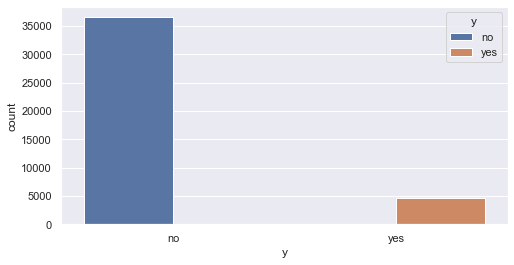

In [107]:
#Distribution of the variable target column
sns.countplot(x="y", data=df, hue = df.y)

####  the target Column is highly Imabalnced

In [108]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


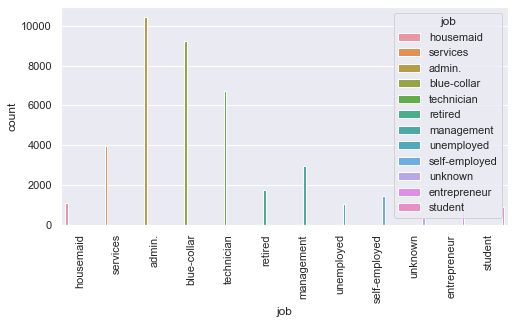

In [109]:
#Distribution of the variable job
sns.countplot(df.job, hue = df.job)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='marital', ylabel='count'>

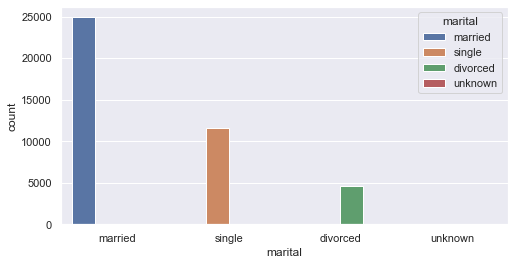

In [110]:
#Distribution of the variable marital
sns.countplot(df.marital, hue = df.marital)

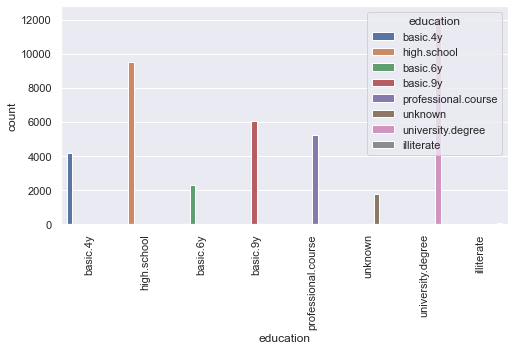

In [111]:
#Distribution of the variable Education
sns.countplot(df.education , hue = df.education)
plt.xticks(rotation = 90)
plt.show()

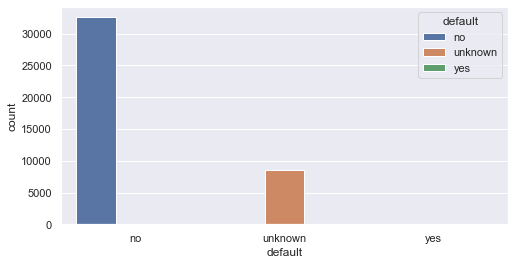

In [112]:
#Distribution of the variable Default
sns.countplot(df.default, hue = df.default)
plt.show()

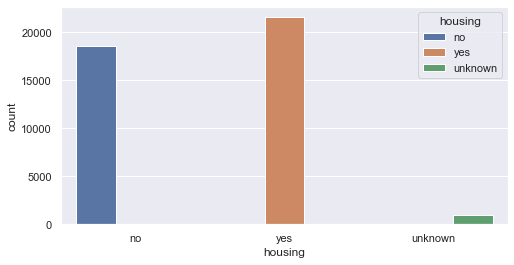

In [113]:
#Distribution of the variable Housing
sns.countplot(df.housing,hue = df.housing )
plt.show()

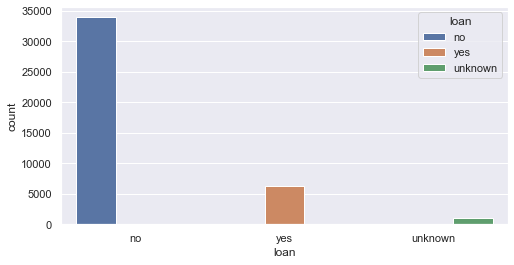

In [114]:
#Distribution of the variable loan
sns.countplot(df.loan, hue = df.loan)
plt.show()

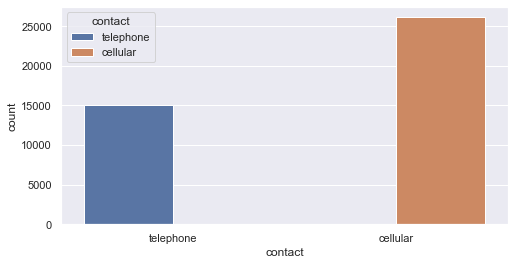

In [115]:
#Distribution of the variable contact
sns.countplot(df.contact, hue = df.contact )
plt.show()

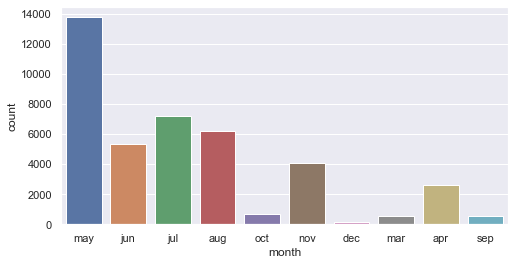

In [116]:
#Distribution of the variable month
sns.countplot(df.month)
plt.show()

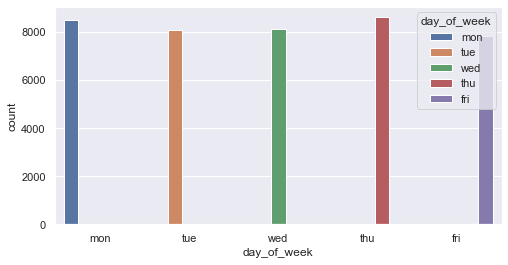

In [117]:
#Distribution of the variable day of week
sns.countplot(df.day_of_week, hue = df.day_of_week)
plt.show()

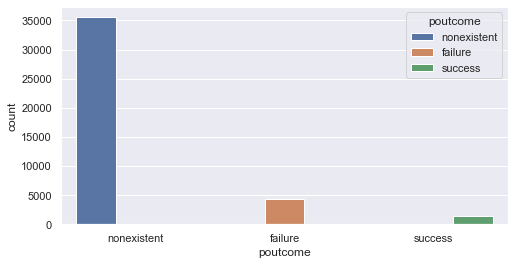

In [118]:
#Distribution of the variable poutcome
sns.countplot(df.poutcome, hue =df.poutcome)
plt.show()

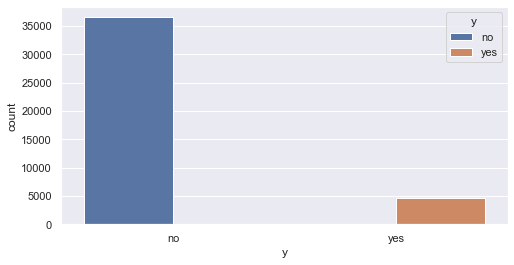

In [119]:
#Distribution of the variable target column y
sns.countplot(df.y,hue=df.y)
plt.show()

## Outlier Detection

<AxesSubplot:>

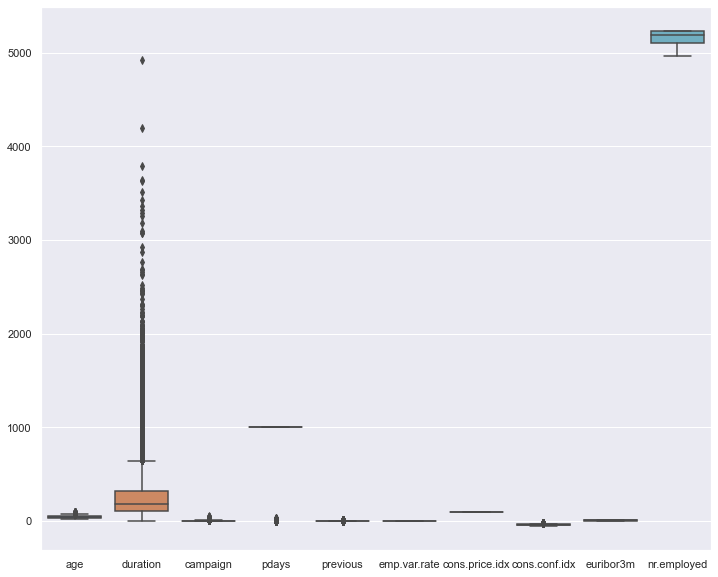

In [120]:
plt.figure(figsize=(12,10))
sns.boxplot(data =df)

### 4. Bivariate Analysis

In [121]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [122]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]


    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

In [123]:
c_palette = ['tab:blue', 'tab:orange']

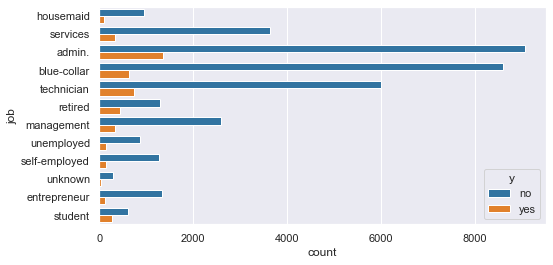

In [124]:
categorical_summarized(df, y = 'job', hue='y', palette=c_palette)

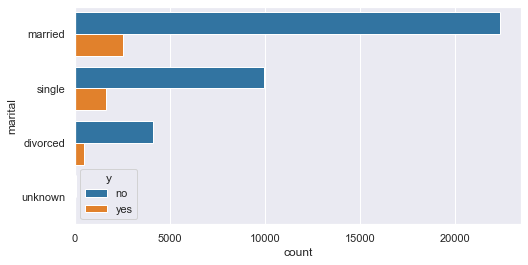

In [125]:
categorical_summarized(df, y = 'marital', hue='y', palette=c_palette)

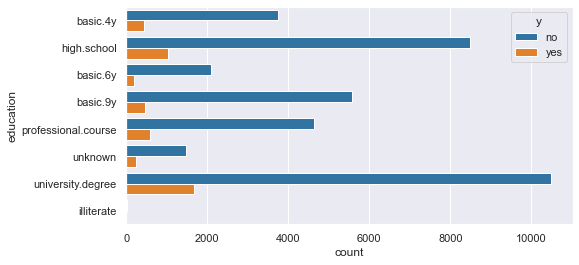

In [126]:
categorical_summarized(df, y = 'education', hue='y', palette=c_palette)

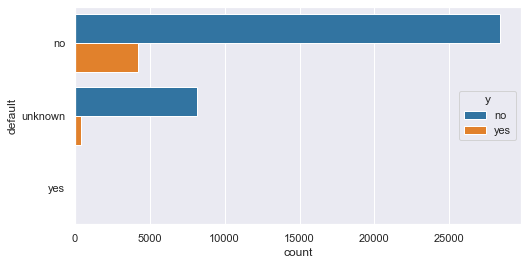

In [127]:
categorical_summarized(df, y = 'default', hue='y', palette=c_palette)

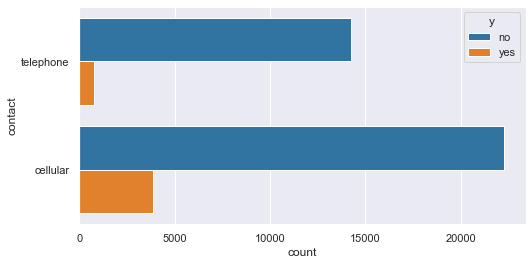

In [128]:
categorical_summarized(df, y = 'contact', hue='y', palette=c_palette)

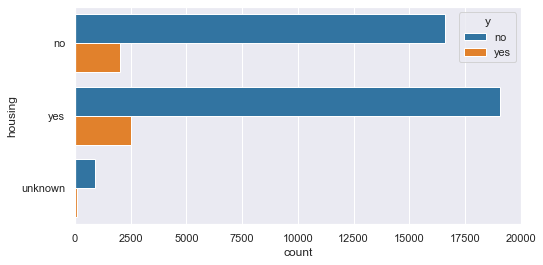

In [129]:
categorical_summarized(df, y = 'housing', hue='y', palette=c_palette)

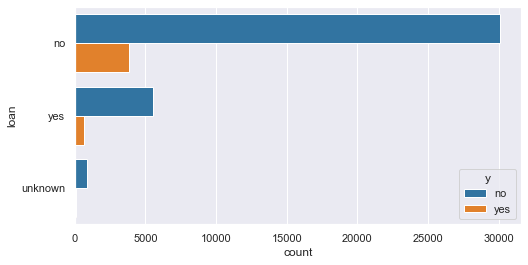

In [130]:
categorical_summarized(df, y = 'loan', hue='y', palette=c_palette)

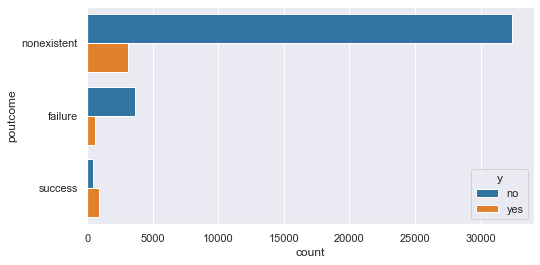

In [131]:
categorical_summarized(df, y = 'poutcome', hue='y', palette=c_palette)

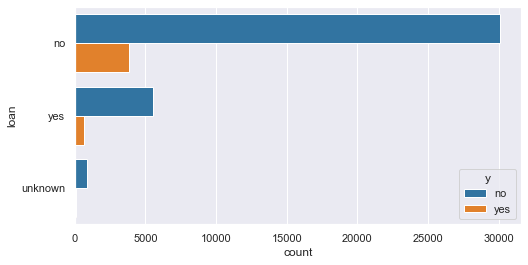

In [132]:
categorical_summarized(df, y = 'loan', hue='y', palette=c_palette)

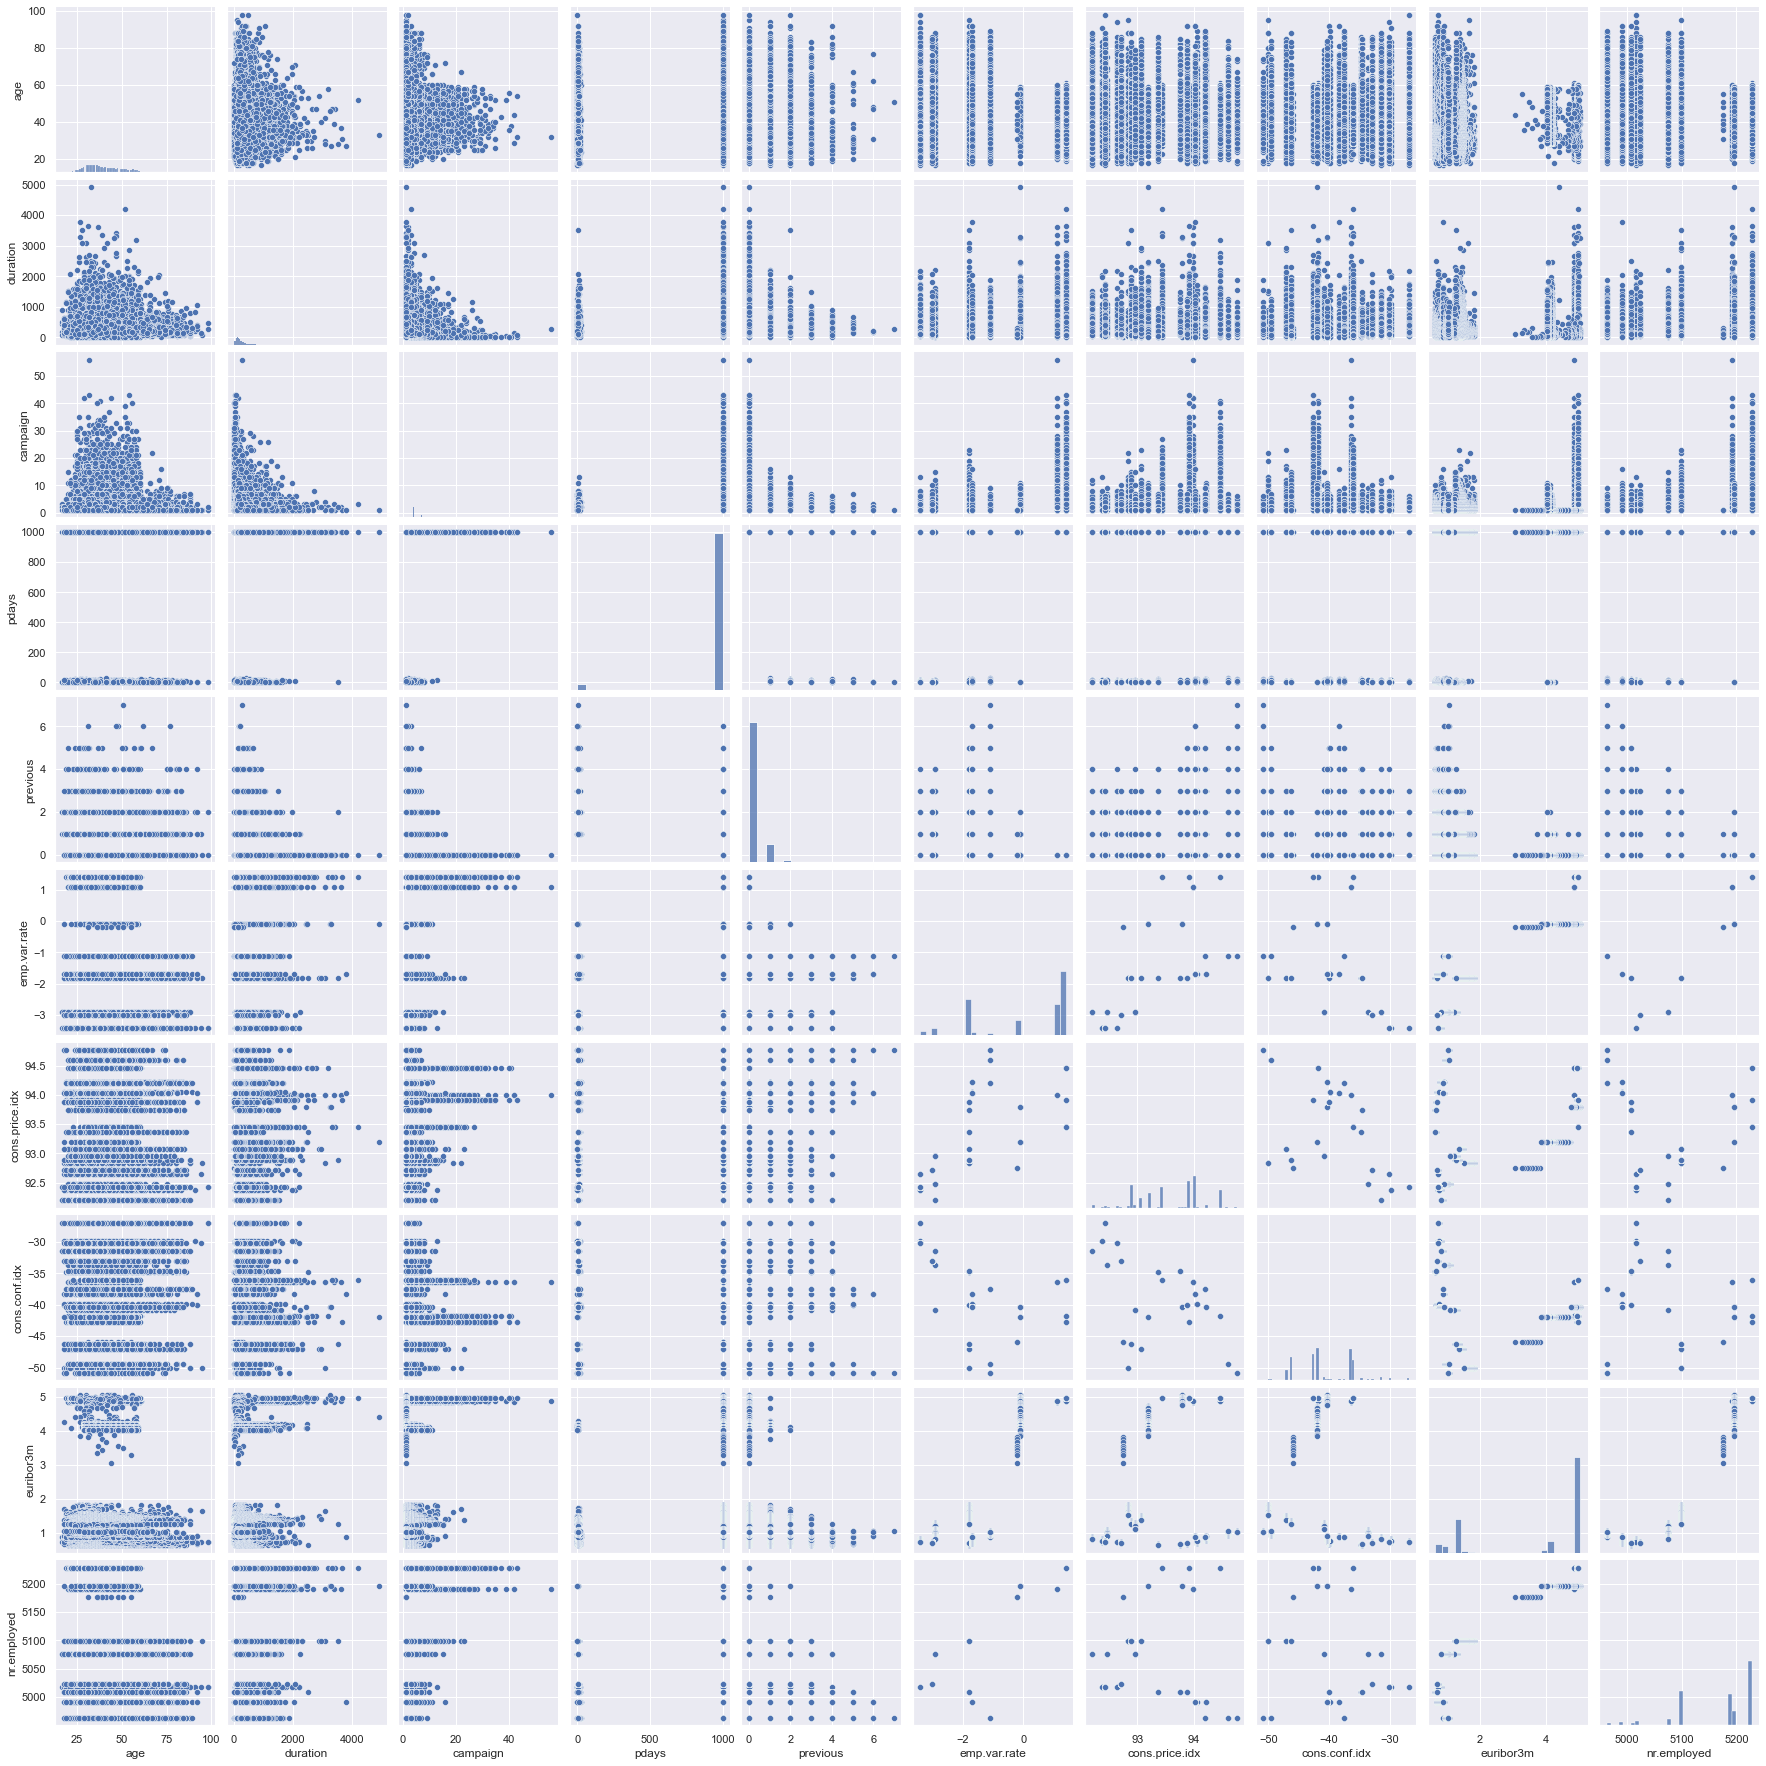

In [133]:
sns.pairplot(df)

<AxesSubplot:>

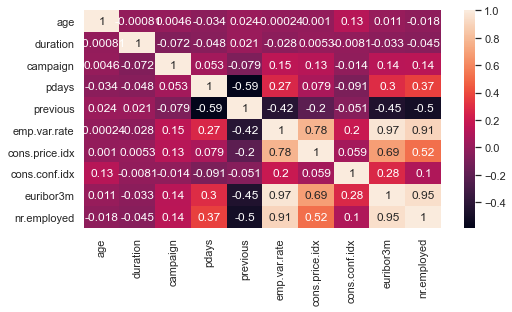

In [134]:
sns.heatmap( df.corr(),annot = True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [136]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(df['job'])
df['job'] = labelencoder.fit_transform(df['job'])


In [137]:
df.job.value_counts()

0     10419
1      9253
9      6739
7      3967
4      2924
5      1718
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64

In [138]:
df.marital = df.marital.replace(('unknown'),('divorced'))
df.marital = df.marital.replace(('married','single','divorced'),(0,1,2))

In [139]:
df.marital.value_counts()

0    24921
1    11564
2     4691
Name: marital, dtype: int64

In [140]:
df.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [141]:
df.education = df.education.replace(('unknown'),('illiterate'))
labelencoder.fit(df['education'])
df['education'] = labelencoder.fit_transform(df['education'])

In [142]:
df.education.value_counts()

6    12164
3     9512
2     6045
5     5240
0     4176
1     2291
4     1748
Name: education, dtype: int64

In [143]:
df.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [144]:
df.default = df.default.replace(('unknown'),('yes'))
df.default = df.default.replace(('no','yes'),(0,1))

In [145]:
df.housing = df.housing.replace(('unknown'),('no'))
df.housing = df.housing.replace(('no','yes'),(0,1))

In [146]:
df.housing.value_counts()

1    21571
0    19605
Name: housing, dtype: int64

In [147]:
df.loan = df.loan.replace(('unknown'),('no'))
df.loan = df.loan.replace(('no','yes'),(0,1))

In [148]:
df.loan.value_counts()

0    34928
1     6248
Name: loan, dtype: int64

In [149]:
df.contact = df.contact.replace(('telephone','cellular'),(0,1))

In [150]:
df.contact.value_counts()

1    26135
0    15041
Name: contact, dtype: int64

In [151]:
df.day_of_week.value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [152]:
df.day_of_week = df.day_of_week.replace(('mon','tue','wed','thu','fri'),(1,2,3,4,5))

In [153]:
labelencoder.fit(df['month'])
df['month'] = labelencoder.fit_transform(df['month'])

In [154]:
df.poutcome.value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [155]:
df.poutcome = df.poutcome.replace(('nonexistent','failure','success'),(0,1,2))

In [156]:
df.y = df.y.replace(('no','yes'),(0,1))

In [157]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,0,0,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,0,3,1,0,0,0,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,0,3,0,1,0,0,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,1,0,0,0,0,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,0,3,0,0,1,0,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [158]:
df.iloc[1]

age                 57.000
job                  7.000
marital              0.000
education            3.000
default              1.000
housing              0.000
loan                 0.000
contact              0.000
month                6.000
day_of_week          1.000
duration           149.000
campaign             1.000
pdays              999.000
previous             0.000
poutcome             0.000
emp.var.rate         1.100
cons.price.idx      93.994
cons.conf.idx      -36.400
euribor3m            4.857
nr.employed       5191.000
y                    0.000
Name: 1, dtype: float64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

<AxesSubplot:>

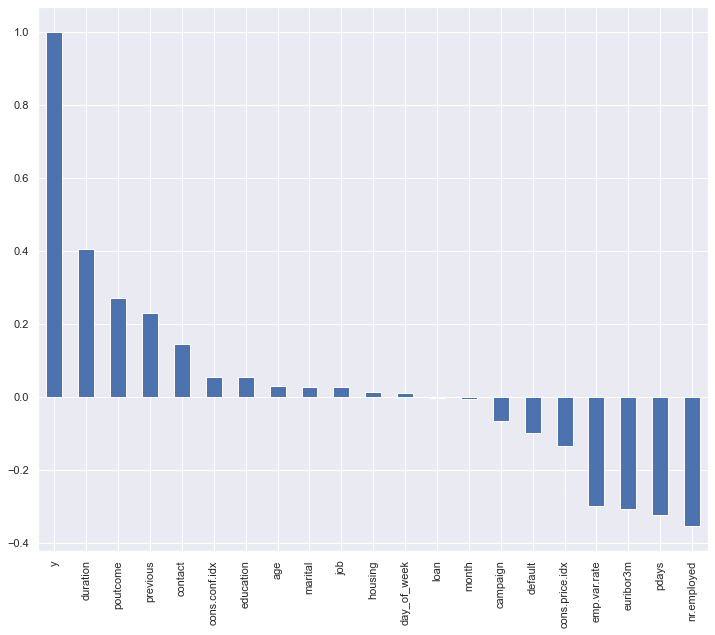

In [160]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
corr_matrix["y"].sort_values(ascending=False).plot(kind='bar')


In [161]:
print(corr_matrix["y"].sort_values(ascending=False))

y                 1.000000
duration          0.405297
poutcome          0.270399
previous          0.230202
contact           0.144774
cons.conf.idx     0.054802
education         0.054533
age               0.030381
marital           0.026244
job               0.025248
housing           0.011804
day_of_week       0.009993
loan             -0.004478
month            -0.006051
campaign         -0.066361
default          -0.099356
cons.price.idx   -0.136134
emp.var.rate     -0.298289
euribor3m        -0.307740
pdays            -0.324948
nr.employed      -0.354669
Name: y, dtype: float64


In [162]:
X = df.drop('y',axis = 1) 
y = df.y

In [163]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [164]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())
print(x_resample.shape)
print(y_resample.shape)

(73074, 20)
(73074,)


In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_resample, y_resample,test_size=0.3,random_state=45)

In [166]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,roc_auc_score

## Model Building and Evalution

In [167]:
def model(X_train,X_test,y_train,y_test,clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (3, 3)
    sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
    plt.show()
    cr = classification_report(y_test, y_pred)
    print(cr)
    
    print("Precision_score Is: ",precision_score(y_test,y_pred))
    print("Recall_score Is: ",recall_score(y_test,y_pred))
    print("roc_auc_score Is: ",roc_auc_score(y_test,y_pred))
    

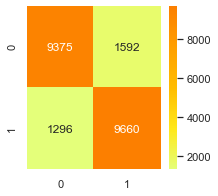

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     10967
           1       0.86      0.88      0.87     10956

    accuracy                           0.87     21923
   macro avg       0.87      0.87      0.87     21923
weighted avg       0.87      0.87      0.87     21923

Precision_score Is:  0.8585140419480981
Recall_score Is:  0.8817086527929902
roc_auc_score Is:  0.8682729458913432


In [168]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
model(X_train,X_test,y_train,y_test,logReg)

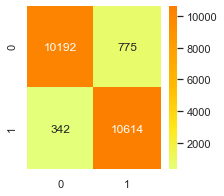

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     10967
           1       0.93      0.97      0.95     10956

    accuracy                           0.95     21923
   macro avg       0.95      0.95      0.95     21923
weighted avg       0.95      0.95      0.95     21923

Precision_score Is:  0.9319518833962596
Recall_score Is:  0.9687842278203724
roc_auc_score Is:  0.9490588413652786


In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(X_train,X_test,y_train,y_test,rfc)

## XGB Classifier

[09:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


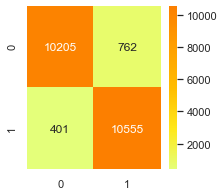

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     10967
           1       0.93      0.96      0.95     10956

    accuracy                           0.95     21923
   macro avg       0.95      0.95      0.95     21923
weighted avg       0.95      0.95      0.95     21923

Precision_score Is:  0.9326676681099231
Recall_score Is:  0.9633990507484483
roc_auc_score Is:  0.9469589399816829


In [170]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model(X_train,X_test,y_train,y_test,xgb)

In [171]:
from sklearn.model_selection import RandomizedSearchCV

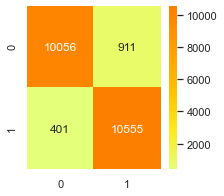

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10967
           1       0.92      0.96      0.94     10956

    accuracy                           0.94     21923
   macro avg       0.94      0.94      0.94     21923
weighted avg       0.94      0.94      0.94     21923

Precision_score Is:  0.920547706261992
Recall_score Is:  0.9633990507484483
roc_auc_score Is:  0.9401658333891781


In [172]:
from lightgbm import LGBMClassifier
lgbm =LGBMClassifier()
model(X_train,X_test,y_train,y_test,lgbm)

In [173]:
pred_prob1 = logReg.predict_proba(X_test)
pred_prob2 = rfc.predict_proba(X_test)
pred_prob3 = xgb.predict_proba(X_test)
pred_prob4 = lgbm.predict_proba(X_test)

In [174]:
from sklearn.metrics import roc_curve

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])



fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)



# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)



print(auc_score1, auc_score2,auc_score3,auc_score4)

0.9306483208795292 0.9913095396581726 0.9901965097389817 0.9869963619824923


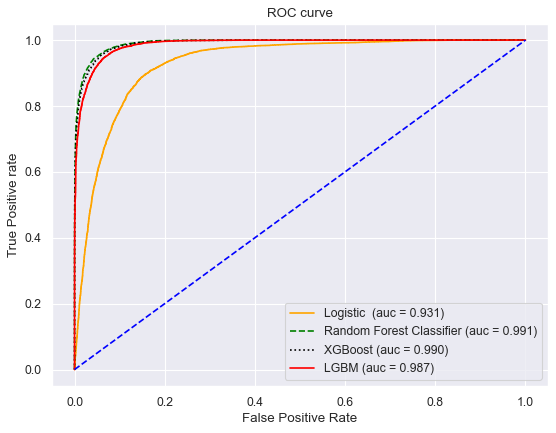

In [178]:
# plot roc curves
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(fpr1, tpr1, linestyle='solid',color='orange', label='Logistic  (auc = %0.3f)'%auc_score1)
plt.plot(fpr2, tpr2, linestyle='dashed',color='green', label='Random Forest Classifier (auc = %0.3f)'%auc_score2)
plt.plot(fpr3, tpr3, linestyle='dotted',color='black', label='XGBoost (auc = %0.3f)'%auc_score3)
plt.plot(fpr4, tpr4, linestyle='solid',color='red', label='LGBM (auc = %0.3f)' %auc_score4)

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();